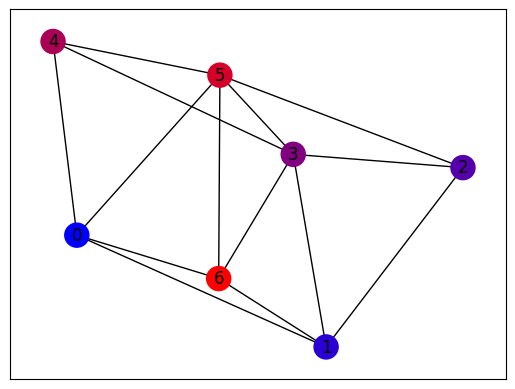

In [25]:
import networkx as nx
import json
from queue import Queue


class Graph:
    def __init__(self):
        self.vertices = []

    def add_vertex(self):
        self.vertices.append([])

    def add_edge(self, u, v):
        if u >= len(self.vertices):
            for i in range(len(self.vertices), u + 1):
                self.add_vertex()
        if v >= len(self.vertices):
            for i in range(len(self.vertices), v + 1):
                self.add_vertex()
        self.vertices[u].append(v)
        self.vertices[v].append(u)

    def neighbors(self, u):
        return self.vertices[u]

    def from_list_of_edges(self, edges):
        for edge in edges:
            self.add_edge(edge[0], edge[1])

    def to_networkx(self):
        G = nx.Graph()
        for u, neighbors in enumerate(self.vertices):
            for v in neighbors:
                G.add_edge(u, v)
        return G


def load_graph_from_json(filename):
    with open(filename) as f:
        data = json.load(f)
    G = Graph()
    G.from_list_of_edges(data)
    return G


G = load_graph_from_json('edges.json')


def depth_first_search(G, u):
    visited = set()
    labels = {}
    stack = [(u, 0)]
    while stack:
        u, depth = stack.pop()
        if u not in labels:
            labels[u] = depth
        if u not in visited:
            visited.add(u)
            for v in G.neighbors(u):
                if v not in visited:
                    stack.append((v, depth + 1))
    return labels


H = G.to_networkx()
depths = depth_first_search(G, 1)
colors = [(depths[u] / max(depths.values()), 0, 1 - depths[u] / max(depths.values())) for u in H.nodes()]
nx.draw_networkx(H, pos=nx.spring_layout(H), labels=depths, node_color=colors)